In [2]:
# Instalar TensorFlow
%pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.4/601.4 MB 20.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 51.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 78.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 54.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
  Consider ad

In [3]:
# Importar librerias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

2024-10-24 01:07:59.752460: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-24 01:07:59.943627: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-24 01:08:00.135310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 01:08:00.356794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 01:08:00.425043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 01:08:00.827728: I tensorflow/core/platform/cpu_feature_gu

In [4]:
# Definir las rutas a los datos
train_dir = 'test_data'  # Ruta al directorio de entrenamiento

In [5]:
# Generador de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalización
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Cargar los datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Tamaño de entrada del modelo
    batch_size=32,
    class_mode='binary'  # Dos clases: perros y gatos
)

Found 237 images belonging to 2 classes.


In [6]:
# Cargar el modelo preentrenado MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Agregar capas de salida personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)  # Salida binaria

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=x)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Entrenar el modelo
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2024-10-24 01:08:32.237827: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2024-10-24 01:08:32.276685: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-10-24 01:08:32.933802: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-10-24 01:08:32.997258: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2024-10-24 01:08:33.056233: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5875 - loss: 0.6629
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7812 - loss: 0.5083
Epoch 3/10


2024-10-24 01:08:43.986509: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/local/python/3.12.1/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8213 - loss: 0.4404 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.8125 - loss: 0.4112
Epoch 5/10


2024-10-24 01:08:54.258666: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 988ms/step - accuracy: 0.8692 - loss: 0.2948
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.9375 - loss: 0.2492
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9179 - loss: 0.2548
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.1932  
Epoch 9/10


2024-10-24 01:09:12.537263: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9641 - loss: 0.1772
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.9231 - loss: 0.2515


In [9]:
# Evaluación del modelo con precision de la clasificación
loss, accuracy = model.evaluate(train_generator)
print('Loss:', loss)
print('Accuracy:', accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 992ms/step - accuracy: 0.9572 - loss: 0.1566
Loss: 0.16637010872364044
Accuracy: 0.949367105960846


In [11]:
# Guardar el modelo
model.save('dog_cat_classifier.h5')

In [16]:
# Cargar el modelo entrenado desde el archivo
model = tf.keras.models.load_model('dog_cat_classifier.h5')

In [22]:
from tensorflow.keras.preprocessing import image
# Importar numpy para manipulación de imágenes
import numpy as np
import matplotlib.pyplot as plt

# Poner fuente tipográfica Dejavu Serif en Matplolit
plt.rc('font', family='DejaVu Serif')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


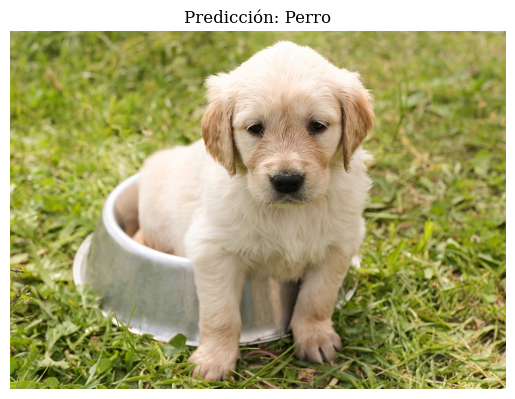

In [23]:
def predict_and_show_image(img_path):
    # Cargar y preprocesar la imagen
    img = image.load_img(img_path, target_size=(224, 224))  # Redimensionar a 224x224
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para el lote
    img_array /= 255.0  # Normalización
    
    # Realizar la predicción
    pred = model.predict(img_array)
    prediction = "Perro" if pred[0] > 0.5 else "Gato"
    
    # Mostrar la imagen junto con la predicción
    plt.imshow(image.load_img(img_path))  # Cargar la imagen en su tamaño original
    plt.axis('off')  # Quitar los ejes
    plt.title(f"Predicción: {prediction}")  # Mostrar la predicción en el título
    plt.show()

# Ruta de la imagen de tu perro
img_path = 'image-perro.png'  # Cambia esto a la ruta real de tu imagen

# Llamar a la función para predecir y mostrar la imagen
predict_and_show_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


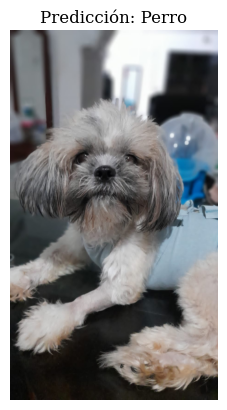

In [24]:
def predict_and_show_image(img_path):
    # Cargar y preprocesar la imagen
    img = image.load_img(img_path, target_size=(224, 224))  # Redimensionar a 224x224
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para el lote
    img_array /= 255.0  # Normalización
    
    # Realizar la predicción
    pred = model.predict(img_array)
    prediction = "Perro" if pred[0] > 0.5 else "Gato"
    
    # Mostrar la imagen junto con la predicción
    plt.imshow(image.load_img(img_path))  # Cargar la imagen en su tamaño original
    plt.axis('off')  # Quitar los ejes
    plt.title(f"Predicción: {prediction}")  # Mostrar la predicción en el título
    plt.show()

# Ruta de la imagen de tu perro
img_path = 'Shannon-Perro.jpg'  # Cambia esto a la ruta real de tu imagen

# Llamar a la función para predecir y mostrar la imagen
predict_and_show_image(img_path)